# Network analysis with Networkx

Higgs Twitter Dataset https://snap.stanford.edu/data/higgs-twitter.html

In [19]:
import gzip

with gzip.open('higgs-social_network.edgelist.gz','rt') as fin:        
     data = [line.replace('\n', '').replace('b','').split(' ') for line in fin]   

In [7]:
data_tuple = [tuple(i) for i in data]

In [34]:
import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from operator import itemgetter
import seaborn as sns; sns.set()

In [9]:
G = nx.Graph()
G.add_edges_from(data_tuple)

In [14]:
degrees = [val for (node, val) in G.degree()]
print(f'Number of nodes:      \t{G.number_of_nodes()}')
print(f'Number of edges:      \t{G.number_of_edges()}')
print(f'Max degree:           \t{np.max(degrees)}')
print(f"Min degree:           \t{np.min(degrees)}") 
print(f"Average degree:       \t{np.mean(degrees):.1f}")  
print(f"Most frequent degree: \t{stats.mode(degrees)[0][0]}") 

Number of nodes:      	456626
Number of edges:      	12508436
Max degree:           	51386
Min degree:           	1
Average degree:       	54.8
Most frequent degree: 	1


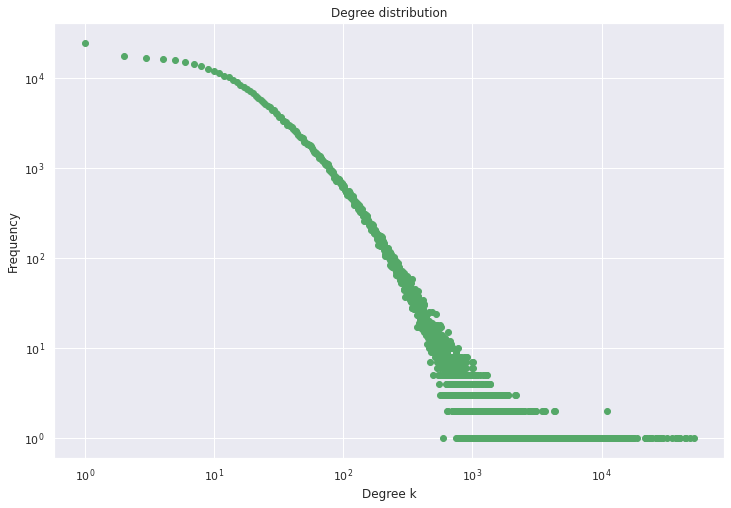

In [36]:
degree_freq = np.array(nx.degree_histogram(G))
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[:], degree_freq[:],'go') 
plt.xlabel('Degree k')
plt.ylabel('Frequency')
plt.title('Degree distribution')
plt.show()

In [21]:
print(f"Number of connected components: \t{nx.number_connected_components(G)}")  

Number of connected components: 	156


Let's consider the largest connected component

In [22]:
largest_subgraph = max((G.subgraph(c) for c in nx.connected_components(G)), key=len)

In [23]:
deg = [val for (node, val) in largest_subgraph.degree()]
print(f'Number of nodes:      \t{largest_subgraph.number_of_nodes()}')
print(f'Number of edges:      \t{largest_subgraph.number_of_edges()}')
print(f'Max degree:           \t{np.max(deg)}')
print(f"Min degree:           \t{np.min(deg)}") 
print(f"Average degree:       \t{np.mean(deg):.1f}")  
print(f"Most frequent degree: \t{stats.mode(deg)[0][0]}") 

Number of nodes:      	456290
Number of edges:      	12508244
Max degree:           	51386
Min degree:           	1
Average degree:       	54.8
Most frequent degree: 	1


In [26]:
degree_dict = dict(largest_subgraph.degree(largest_subgraph.nodes()))
nx.set_node_attributes(largest_subgraph, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [37]:
from community import community_louvain
partition = community_louvain.best_partition(largest_subgraph)
global_modularity = community_louvain.modularity(partition, largest_subgraph)
print(f'Modularity:   \t{global_modularity}')

Modularity:   	0.6186512183066378


### Degree distribution - comparison with powerlaws


In [29]:
import powerlaw
results = powerlaw.Fit(deg)
R, p = results.distribution_compare('power_law', 'truncated_power_law')
if R > 0: 
    print('pwl is the best fit')
else:
     print('truncated pwl is the best fit')

Calculating best minimal value for power law fit


Assuming nested distributions


truncated pwl is the best fit


In [32]:
if R > 0:
    print(f'distribution:   \t pwl')
    print(f'xmin:           \t {results.power_law.xmin}')
    print(f'k:              \t {results.power_law.alpha}')
    print(f'error_k:        \t {results.power_law.sigma}')

else:
    print(f'distribution:   \t truncated pwl')
    print(f'xmin:           \t {results.truncated_power_law.xmin}')
    print(f'k:              \t {results.truncated_power_law.alpha}')
    print(f'error_k:        \t {results.truncated_power_law.parameter2}')

distribution:   	 truncated pwl
xmin:           	 614.0
k:              	 2.2947650347373947
error_k:        	 8.766679605403273e-06


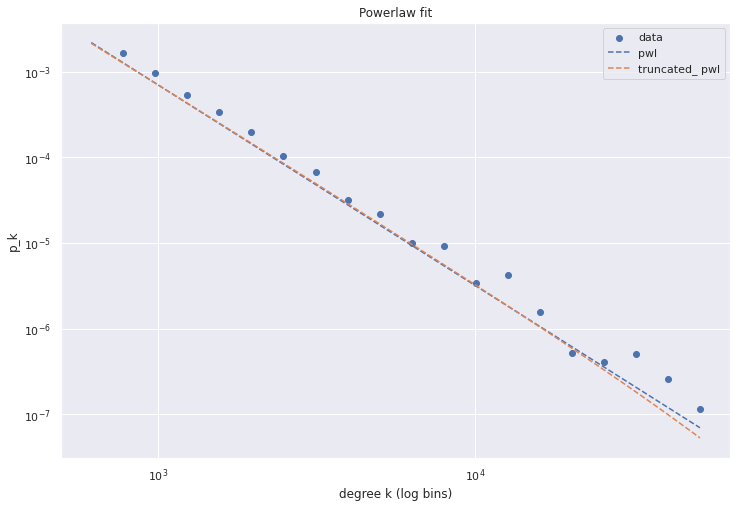

In [35]:
pdf = results.pdf()

plt.figure(figsize=(12, 8)) 
plt.scatter(pdf[0][1:],pdf[1],label = 'data')
results.power_law.plot_pdf(label = 'pwl', linestyle = '--')
results.truncated_power_law.plot_pdf(label = 'truncated_ pwl', linestyle = '--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('degree k (log bins)')
plt.ylabel('p_k')
plt.title('Powerlaw fit')
plt.legend()
plt.show()